# Data Cleaning & Visualisation

EDA process includes:
- Removing Duplicates 
- Fixing Values
- Normalizing if needed
- Cleaning Outliers
- Looking a feature distribution
- Seperating into categorical and numerical columns
- Visualizing Data

In [565]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib


In [566]:
file_path = 'dataset/student_performance_data.csv'
df = pd.read_csv(file_path)
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [567]:
df.shape

(2392, 15)

In [568]:
df.info()
# 14 columns / Numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [569]:
# Checking for Null Values
null_check = df.isnull().sum().sum()
if null_check == 0:
    print("No Null Values Found")
else:
    print("Null Values Found and Dropped")
    df.dropna()

No Null Values Found


In [570]:
# Checking for duplicate student IDS
if len(df["StudentID"].unique()) == df.shape[0]:
    print("Unique!")

Unique!


In [571]:
# Checking for duplicates
if df.duplicated().sum() != 0:
    df.drop_duplicates()
    print("Duplicates Dropped")
else:
    print("No Duplicates Found")

No Duplicates Found


In [572]:
# Check if all values are numeric
is_numeric = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).notnull().all().all()
if is_numeric:
    print("All values in the dataset are numeric.")
else:
    print("There are non-numeric values in the dataset.")

All values in the dataset are numeric.


/var/folders/_j/sz06lvps65j8xppttgcsvsfr0000gn/T/ipykernel_25673/3803199935.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  is_numeric = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).notnull().all().all()


In [573]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

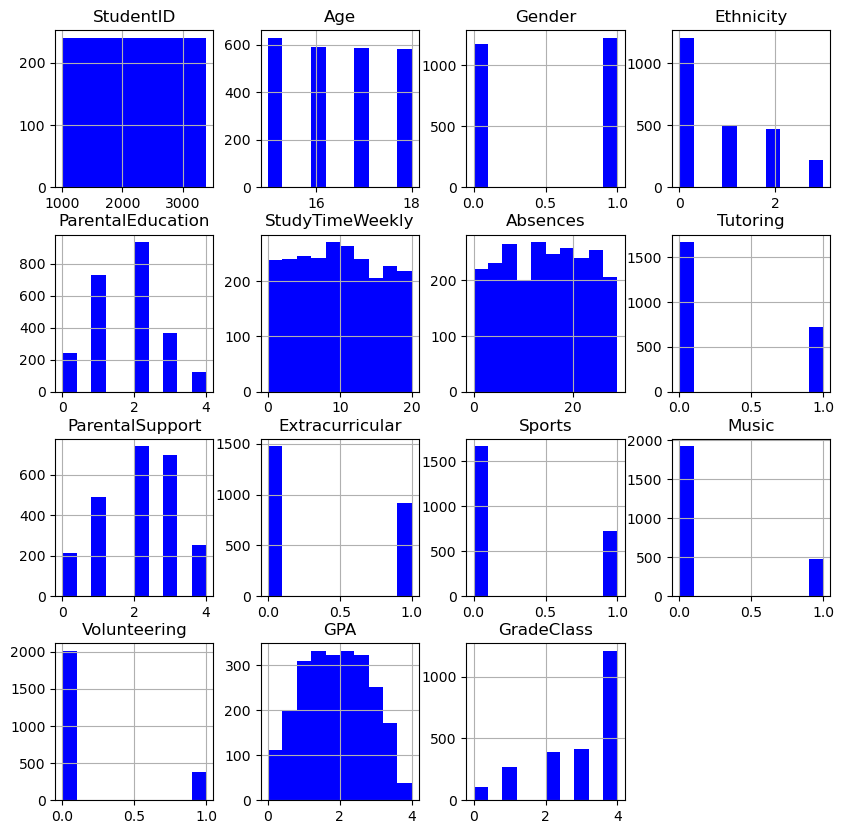

In [574]:
# Checking the feature distribution
df.hist(figsize=(10,10),bins=10, color='blue')

In [575]:
# Seperating into numerical and categorical data
# I automated this process by taking the asssumption that any variable with more than 5 values is likely to be numerical
all_columns = list(df.columns)
numerical_columns = []
categorical_columns = []

for i in all_columns:
    if len(df[i].unique()) <= 5:
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
print('Numerical features: ', numerical_columns)
print('Categorical features: ', categorical_columns) 

Numerical features:  ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
Categorical features:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [576]:
# I also removed studentID as a column
numerical_columns = numerical_columns[1:] 

In [577]:
# Making sure all numerical columns are of the same type
df[numerical_columns] = df[numerical_columns].astype('float64')

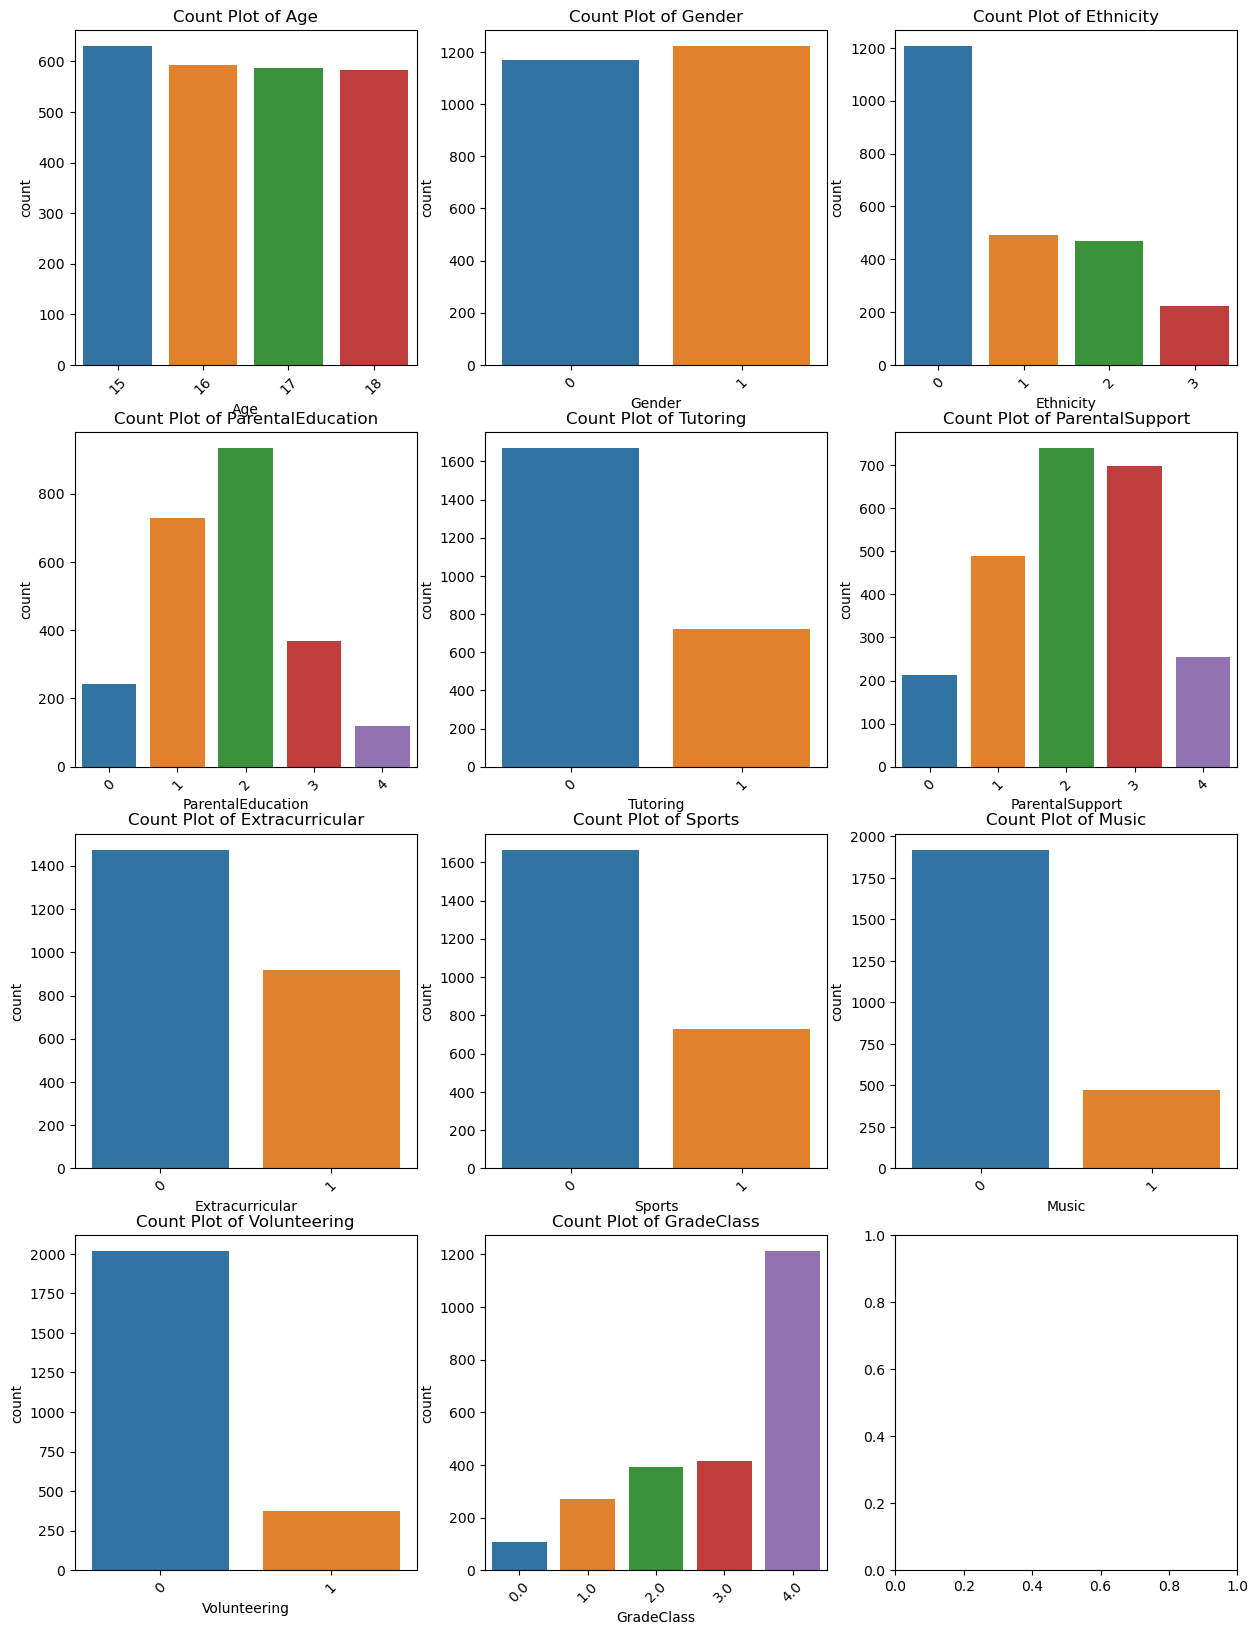

In [578]:
# Plotting countplots for categorical data
n = len(categorical_columns)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45) 
    

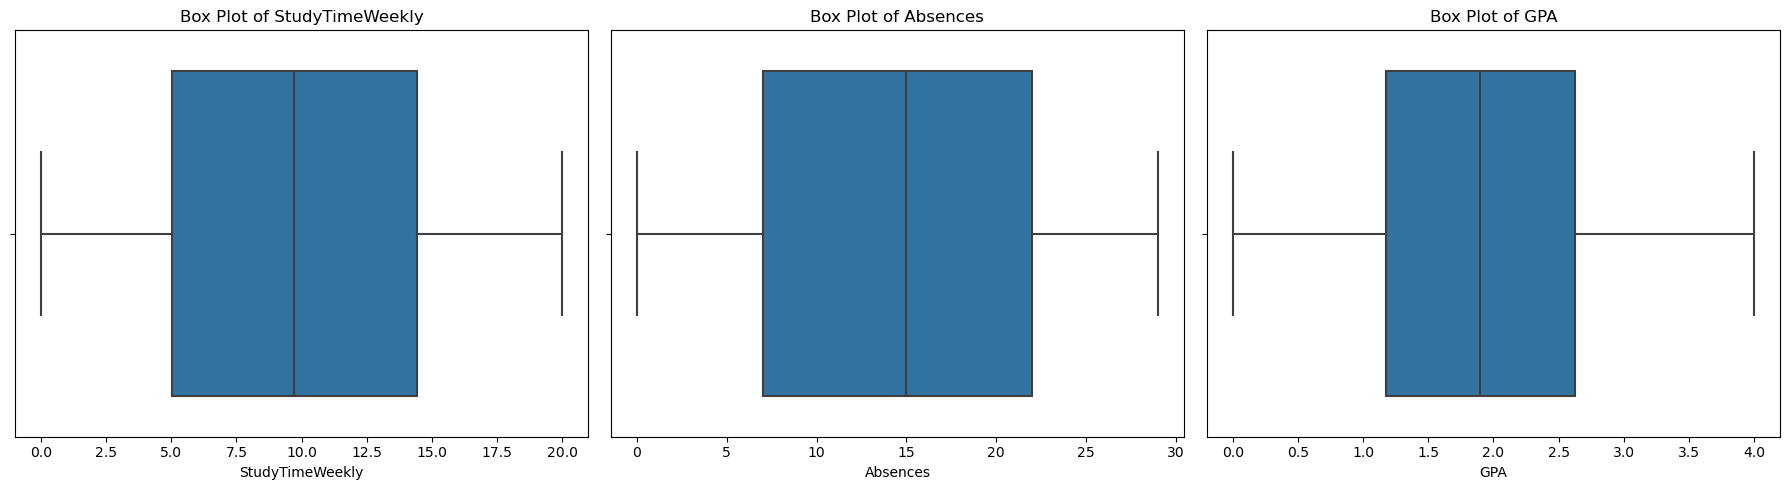

In [579]:
# Plotting box plots for numerical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

/Users/tahafaisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tahafaisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tahafaisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


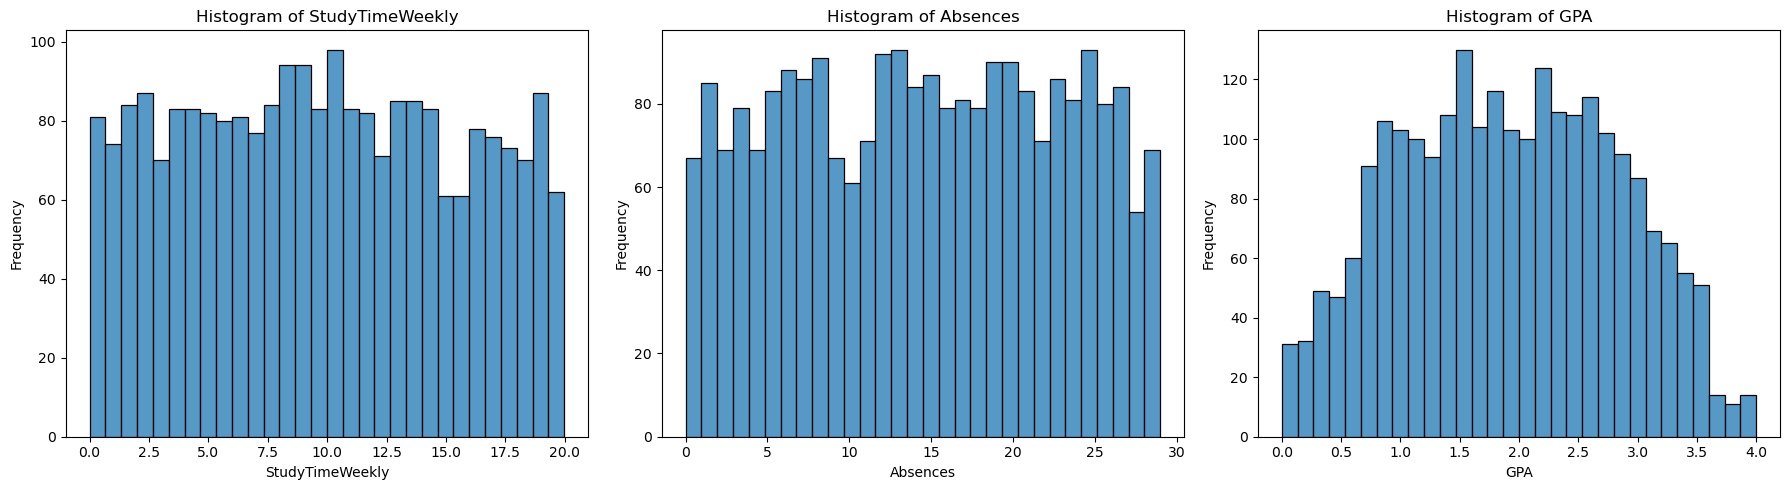

In [580]:
# Plotting histograms for numeric data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=False, ax=axes[i]) 
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/var/folders/_j/sz06lvps65j8xppttgcsvsfr0000gn/T/ipykernel_25673/2677397332.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, ax=axes[i])
/Users/tahafaisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/_j/sz06lvps65j8xppttgcsvsfr0000gn/T/ipykernel_25673/2677397332.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, ax=axes[i])
/Users/tahafaisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

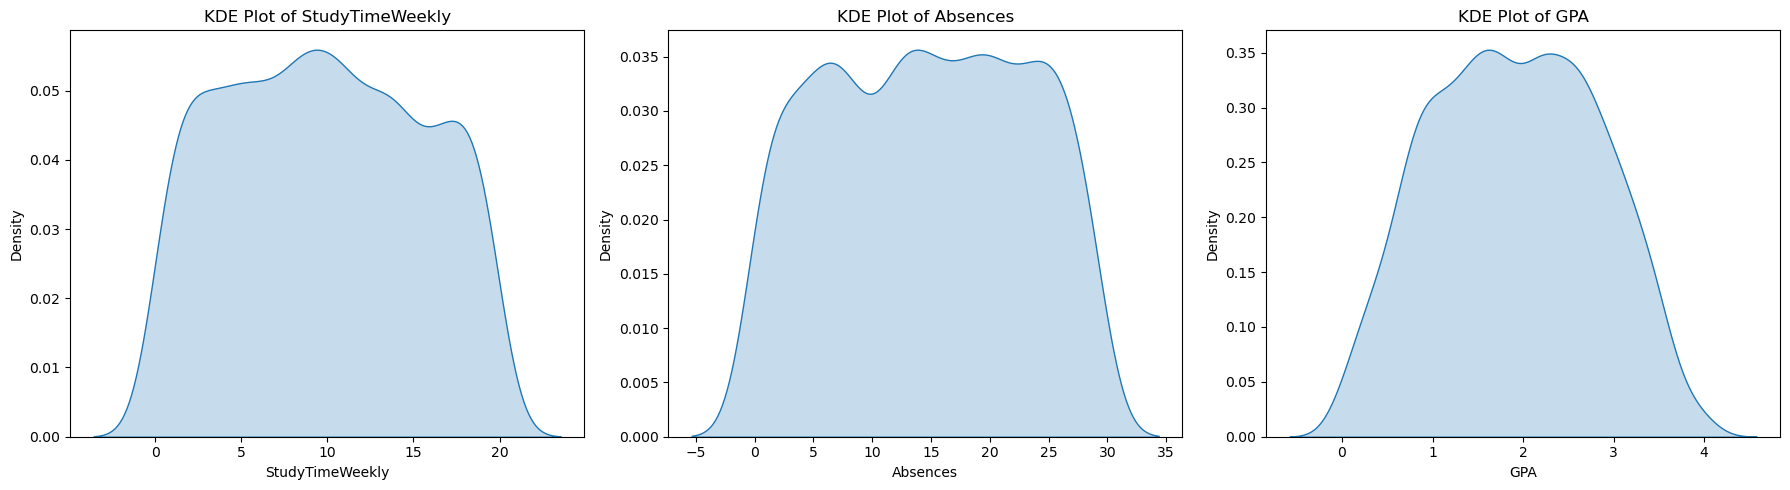

In [581]:
# KDE Plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(numerical_columns):
    sns.kdeplot(df[col], shade=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [582]:
# Most features look like they are normalized, but Encoding and Standardization was done
# Categorical Data
label_encoder = LabelEncoder()
df = df.copy()
for column in df[categorical_columns]:  
    df[column] = label_encoder.fit_transform(df[column])

# Numerical Data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

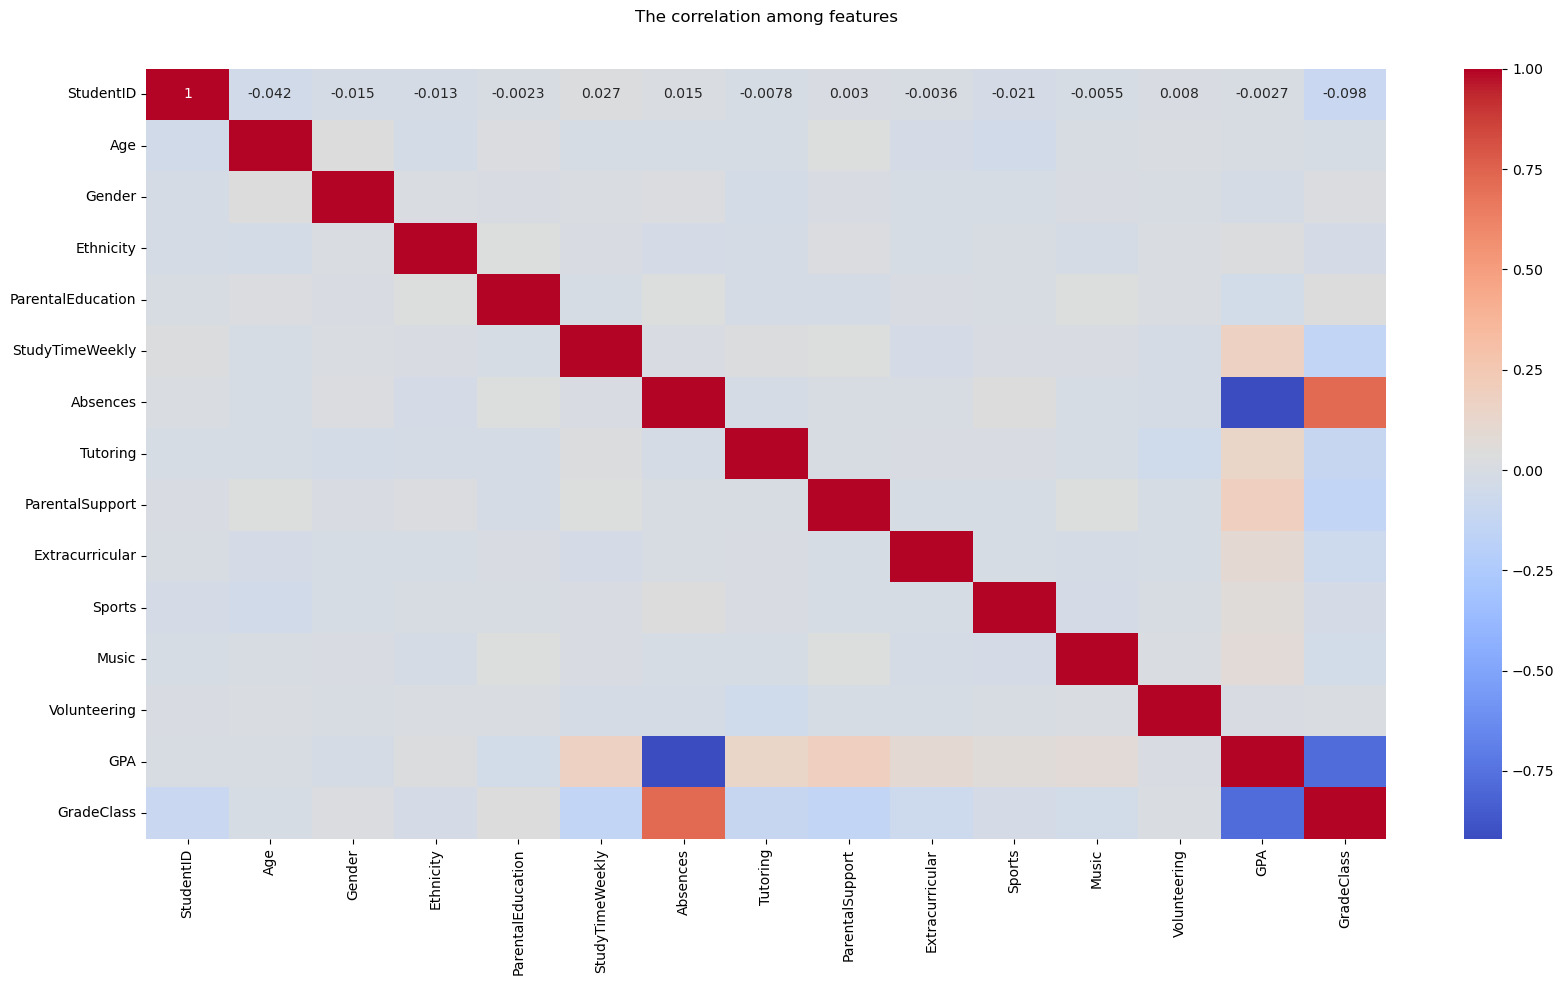

In [583]:
# Plotting a heatmap/correlation matrix
plt.figure(figsize=(20, 10))
df1 = df.select_dtypes(include='number') 
df1.dropna(inplace=True)
matrix = df1.corr()
sns.heatmap(matrix, annot=True,cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

In [584]:
# I am trying to get GradeClass as the output, so I will drop GPA since Gradeclass is directly derived from Gradeclass
# I will also drop StudentID and our target variable Grade Class
df.drop('GPA', axis=1, inplace=True)
df.drop('StudentID', axis=1, inplace=True)
df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,1,0,2,1.780336,-0.890822,1,2,0,0,1,0,2
1,3,0,0,1,0.997376,-1.717694,0,1,0,0,0,0,1
2,0,0,2,3,-0.984045,1.353542,0,2,0,0,0,0,4
3,2,1,0,3,0.045445,-0.063951,0,3,1,0,0,0,3
4,2,1,0,2,-0.902311,0.290422,1,3,0,0,0,0,4


# Model Selection and Building

In [585]:
# Creating the train and test splits
y = df['GradeClass']
df.drop('GradeClass', axis=1, inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

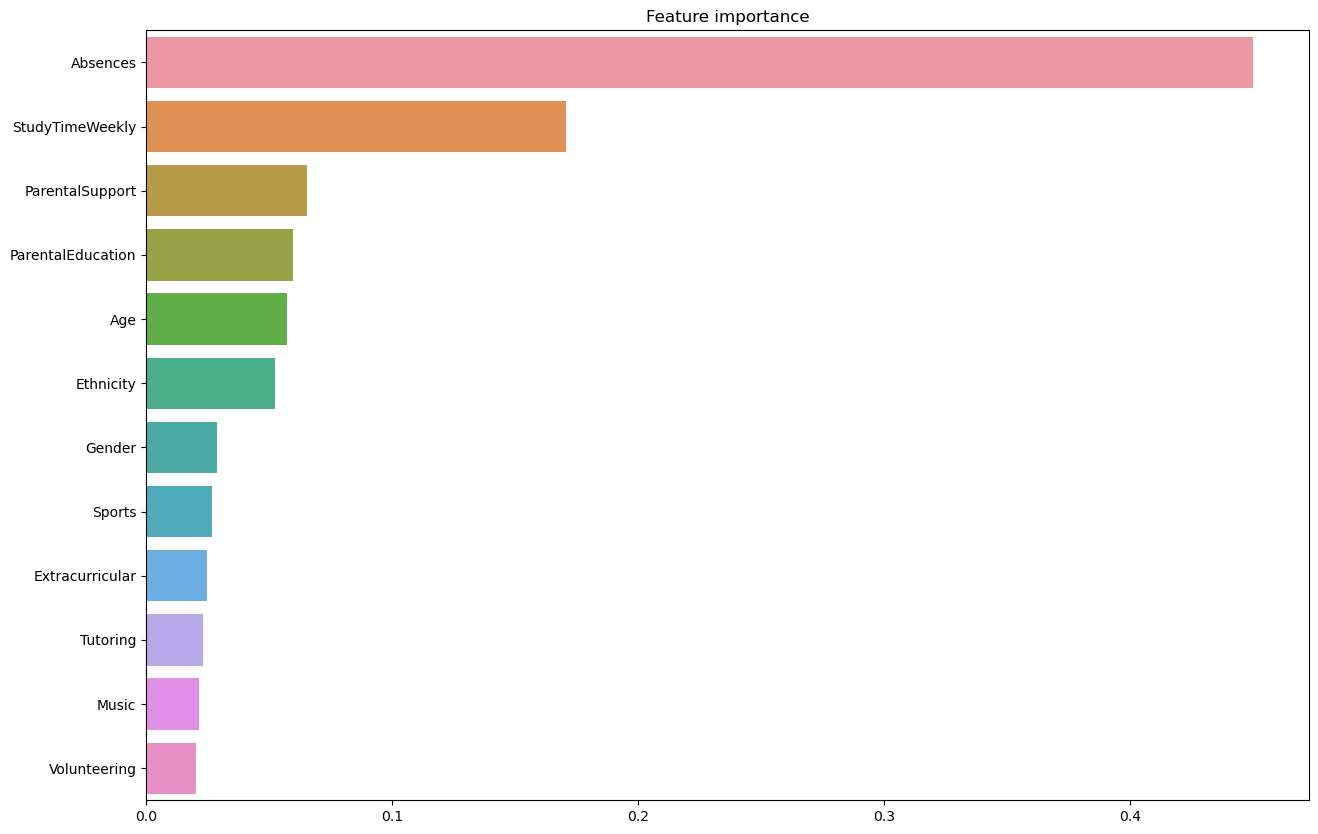

In [586]:
# Tree-based model to check for which features are the most important
RFC = RandomForestClassifier(random_state = 42)
RFC = RFC.fit(X, y)

features_important = pd.Series(data=RFC.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.title("Feature importance")
ax = sns.barplot(y=features_important.index, x=features_important.values, orient='h')

In [587]:
# Selecting a the best model 
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

model_names = []
accuracies = []

for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

max_val = max(accuracies)
index = 0
for i in range(len(accuracies)):
    if accuracies[i] == max_val:
        index = i

print("The best model is", model_names[index])
modl = model_names[index]
best_model = classification_models[modl]

Logistic Regression accuracy: 0.73
K-Nearest Neighbors accuracy: 0.65
Support Vector Machine accuracy: 0.73
Decision Tree accuracy: 0.58
Random Forest accuracy: 0.71
Gradient Boosting accuracy: 0.68
The best model is Support Vector Machine


# Model Evaluation

In [588]:
# Initialize and train model
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

[[  0  10   3   4   4]
 [  0  31  19   2   2]
 [  0   9  50  15   4]
 [  0   0  23  48  12]
 [  0   2   2  16 223]]


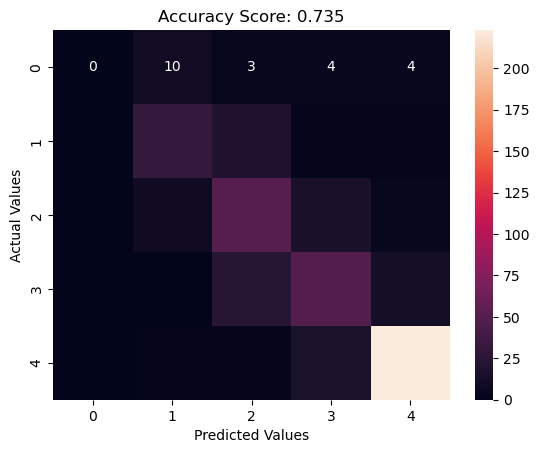

In [589]:
# Confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score))
plt.show()

In [590]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']